In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/leekyuyoung20230313/pythone/raw/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy -O data.npy

In [4]:
data = np.load('data.npy')
# 이미지를 수치화한 데이터

In [5]:
data.shape # 100 X 100 이미지가 300장 있다는 말임.

(300, 100, 100)

In [ ]:
# 위의 (300,100,100)은 '배치'라고 하고 300은 '배치사이드' 라고 한다.

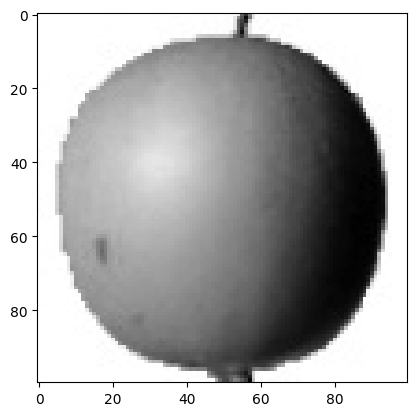

In [58]:
plt.imshow(data[0], cmap='gray_r') # 바탕화면 까만색은 투명처리를 해주고 싶을 때 _r 붙임.

In [59]:
# 그림카드가 300장 있는거. 이게 비지도 학습. 분류를 하는거임. 비슷한 애들끼리 분류를 하는 것이 비지도학습.
# 지도학습과 다르게 y가 안 주어진 것! 
# 정답이 없다면 할 수 있는 건 분류, 군집.

In [61]:
# 비지도학습에선 데이터를 1차원 형태로 만들어 줘야함

In [70]:
apple = data[:100].reshape(-1,100*100)
pineapple = data[100:200].reshape(-1,100*100)
banana = data[200:].reshape(-1,100*100)

([], [])

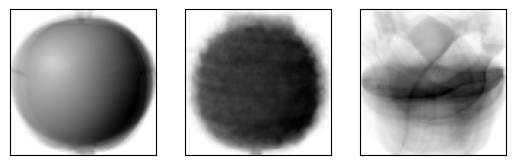

In [75]:
# 평균이미지를 그려보고, 실제 이미지와 평균의 이미지가 비슷하면 해당 이미지를 분류.
# 데이터가 1차원으로 펴져있으니까 그리려면 데이터를 2차원으로 만들어주어야 한다!
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)

plt.subplot(1,3,1)
plt.imshow(apple_mean,cmap='gray_r')  
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(pineapple_mean,cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(banana_mean,cmap='gray_r')
plt.xticks([])
plt.yticks([])

In [76]:
apple_mean.shape

(100, 100)

In [81]:
# 사과의 평균과 가장 가까운 이미지 100개를 추출.
apple_diff = np.abs(data - apple_mean)  # 정답에서 예측을 뺀 것의 절댓값 = 오차.
apple_diff.shape

# 오차의 픽셀들이 모인 것이 300개가 있다.
# 다시 300개를  각각 평균을 내서 가장 작은 놈들

data_apple_mean = np.mean(apple_diff,axis=(1,2))
apple_index = np.argsort(data_apple_mean)[:100] # 여기서 처음부터 100개만 추출. 앞에 있을수록 오차가 작은 애들.

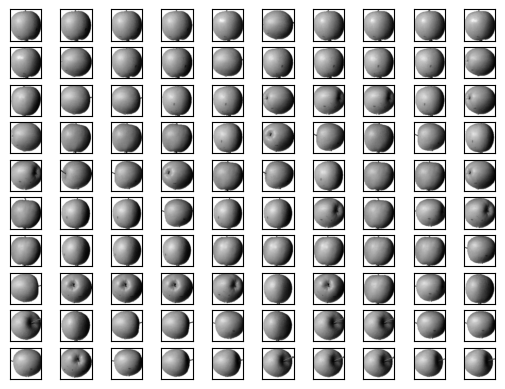

In [82]:
# 오차에 해당하는 각각의 픽셀들이 가장 작은 애들부터. 오차가 가장 적은 애들부터 분류.
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(data[apple_index][i],cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
plt.show()